In [22]:
from sklearn.datasets import make_regression
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [23]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [24]:
plt.scatter(X,y)

<IPython.core.display.Javascript object>

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [26]:
b = -150
m = 27.82
lr = 0.001
all_b = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope = 0
    cost = 0
    for j in range(X.shape[0]):
        slope = slope - 2*(y[j] - (m * X[j]) -  b)
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope)
    all_b.append(b)
    all_cost.append(cost)
    y_pred = m * X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)

<IPython.core.display.Javascript object>

In [27]:
all_b = np.array(all_b).ravel()

In [28]:
all_b

array([-120.4588544 ,  -96.82593791,  -77.91960473,  -62.79453818,
        -50.69448494,  -41.01444235,  -33.27040827,  -27.07518102,
        -22.11899921,  -18.15405376,  -14.98209741,  -12.44453232,
        -10.41448025,   -8.7904386 ,   -7.49120528,   -6.45181862,
         -5.62030929,   -4.95510183,   -4.42293586,   -3.99720308,
         -3.65661686,   -3.38414789,   -3.16617271,   -2.99179256,
         -2.85228845,   -2.74068515,   -2.65140252,   -2.57997641,
         -2.52283553,   -2.47712282])

In [29]:
all_cost = np.array(all_cost).ravel()
all_cost

array([2210040.49020261, 1424629.13499295,  921965.86765877,
        600261.37656489,  394370.50226481,  262600.34271276,
        178267.44059944,  124294.38324692,   89751.62654131,
         67644.26224972,   53495.5491031 ,   44440.37268926,
         38645.05978441,   34936.0595253 ,   32562.29935947,
         31043.09285334,   30070.80068942,   29448.5337045 ,
         29050.28283416,   28795.40227714,   28632.27872065,
         28527.87964449,   28461.06423575,   28418.30237416,
         28390.93478274,   28373.41952423,   28362.20975879,
         28355.0355089 ,   28350.44398898,   28347.50541622])

num_epochs = list(range(1,31))
len(num_epochs)

In [30]:



fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>

In [ ]:
# creating a blank window 
# for the animation 
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 2500000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation1.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>

/opt/homebrew/lib/python3.11/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


IndexError: list index out of range

<IPython.core.display.Javascript object>


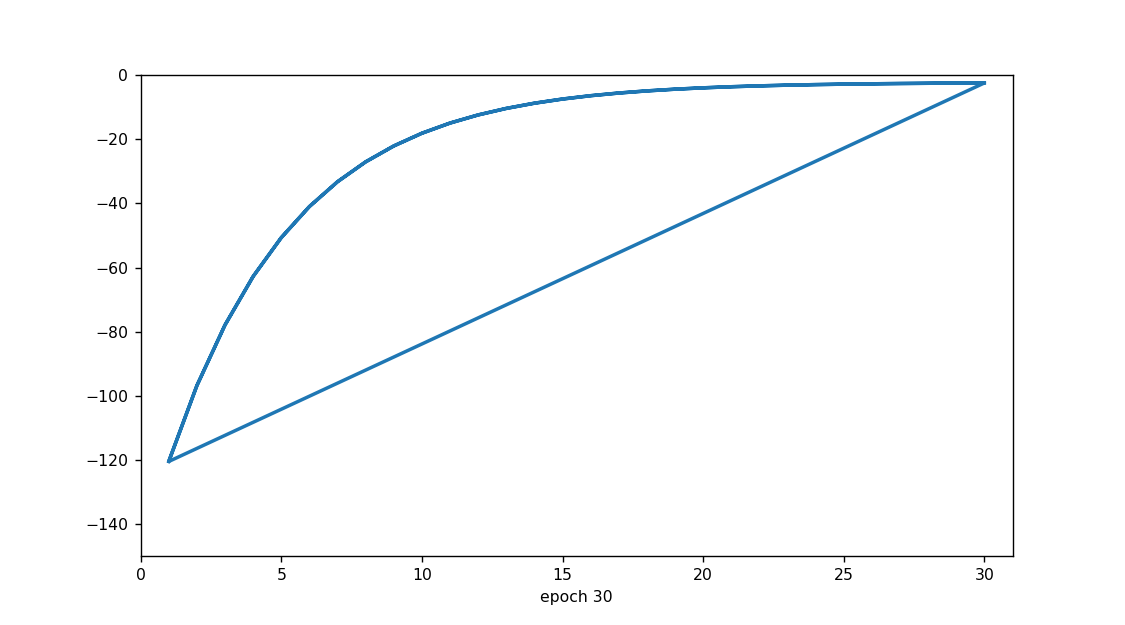

In [ ]:
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-150, 0)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation2.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>


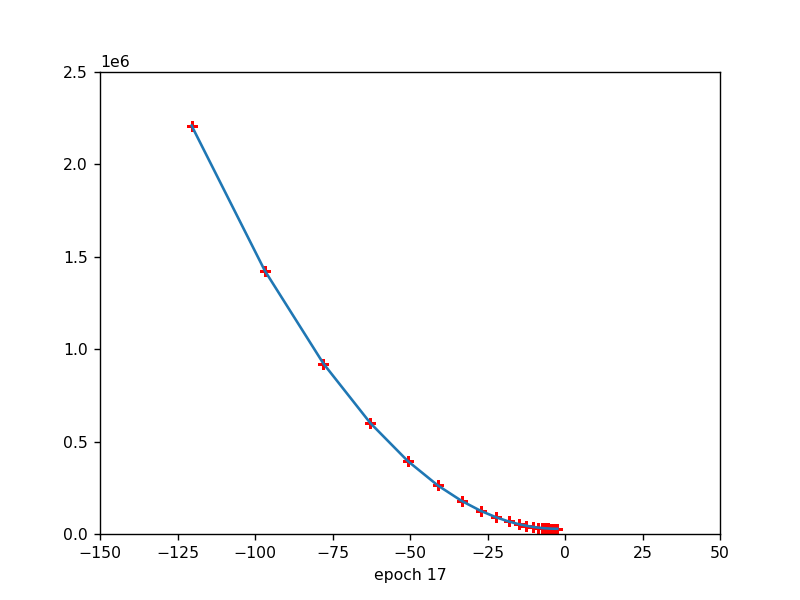

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
sc = ax.scatter(x,y,color='red',marker='+')
plt.xlim(-150,50)
plt.ylim(0,2500000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=30, interval=500, repeat=True) 
plt.show()

f = r"animation3.gif" 
writergif = animation.PillowWriter(fps=2) 
ani.save(f, writer=writergif)

In [ ]:
b_input = np.linspace(-150,150,100)

In [ ]:
cost_input = []

for i in range(len(b_input)):
    this_cost = 0 
    for j in range(X.shape[0]):
        this_cost = this_cost + (y[j] - m*X[j] - b_input[i])**2
    #cost_input.append(this_cost)
    print(this_cost)
        

[5.31856924e+13]
[5.31854779e+13]
[5.31852633e+13]
[5.31850488e+13]
[5.31848342e+13]
[5.31846197e+13]
[5.31844052e+13]
[5.31841906e+13]
[5.31839761e+13]
[5.31837616e+13]
[5.3183547e+13]
[5.31833325e+13]
[5.3183118e+13]
[5.31829035e+13]
[5.31826889e+13]
[5.31824744e+13]
[5.31822599e+13]
[5.31820454e+13]
[5.31818309e+13]
[5.31816163e+13]
[5.31814018e+13]
[5.31811873e+13]
[5.31809728e+13]
[5.31807583e+13]
[5.31805438e+13]
[5.31803293e+13]
[5.31801148e+13]
[5.31799003e+13]
[5.31796858e+13]
[5.31794713e+13]
[5.31792568e+13]
[5.31790423e+13]
[5.31788278e+13]
[5.31786133e+13]
[5.31783988e+13]
[5.31781844e+13]
[5.31779699e+13]
[5.31777554e+13]
[5.31775409e+13]
[5.31773264e+13]
[5.3177112e+13]
[5.31768975e+13]
[5.3176683e+13]
[5.31764685e+13]
[5.31762541e+13]
[5.31760396e+13]
[5.31758251e+13]
[5.31756107e+13]
[5.31753962e+13]
[5.31751818e+13]
[5.31749673e+13]
[5.31747528e+13]
[5.31745384e+13]
[5.31743239e+13]
[5.31741095e+13]
[5.3173895e+13]
[5.31736806e+13]
[5.31734662e+13]
[5.31732517e+13]
[5